In [1]:
import pandas as pd
import logging
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('/kaggle/input/breakhis/Folds.csv')
df1 = df[df["fold"] == 1].copy()  # Use copy to avoid modifying the original DataFrame
df1.rename(columns={"filename": "path"}, inplace=True)

for index, row in df1.iterrows():
    df1.at[index, "name"] = row["path"].split('/')[8]
    df1.at[index, "class"] = row["path"].split('/')[3]
    df1.at[index, "slide_id"] = row["path"].split('/')[8].split("-")[2]
    df1.at[index, "tumor_id"] = row["path"].split('/')[8].split("-")[0].split("_")[2]

print(df1.head())

   fold  mag    grp                                               path  \
0     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
1     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
2     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
3     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
4     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   

                             name   class slide_id tumor_id  
0  SOB_B_A-14-22549AB-100-001.png  benign  22549AB        A  
1  SOB_B_A-14-22549AB-100-002.png  benign  22549AB        A  
2  SOB_B_A-14-22549AB-100-003.png  benign  22549AB        A  
3  SOB_B_A-14-22549AB-100-004.png  benign  22549AB        A  
4  SOB_B_A-14-22549AB-100-005.png  benign  22549AB        A  


In [3]:
def annotations(ax, total=None):
    # Show number in each bar
    if total is None:
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, -10),
                        textcoords='offset points')
    # Show number and percentage in each bar
    else:
        for p in ax.patches:
            count = int(p.get_height())
            percentage = (count / total) * 100
            ax.annotate(f'{count}\n({percentage:.1f}%)', 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, -15),
                        textcoords='offset points')
    return ax

* Análise estatística do conjunto


Quantidade total de imagens:  7909



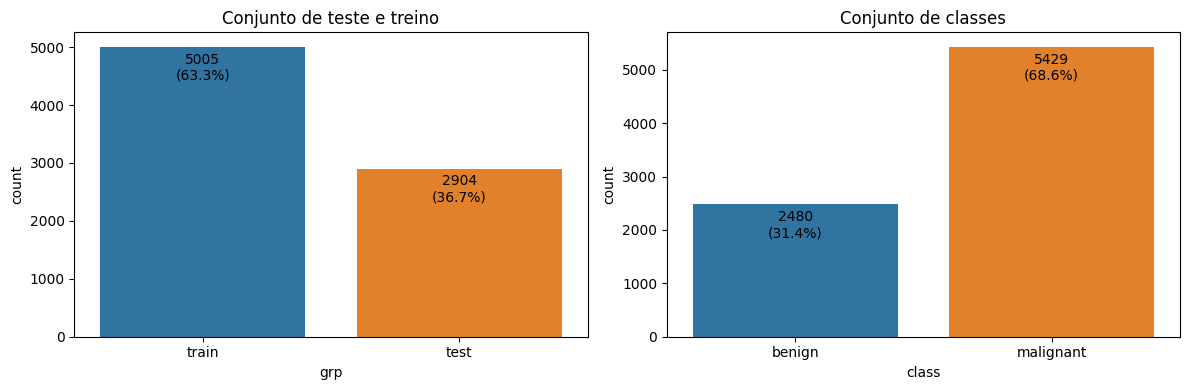

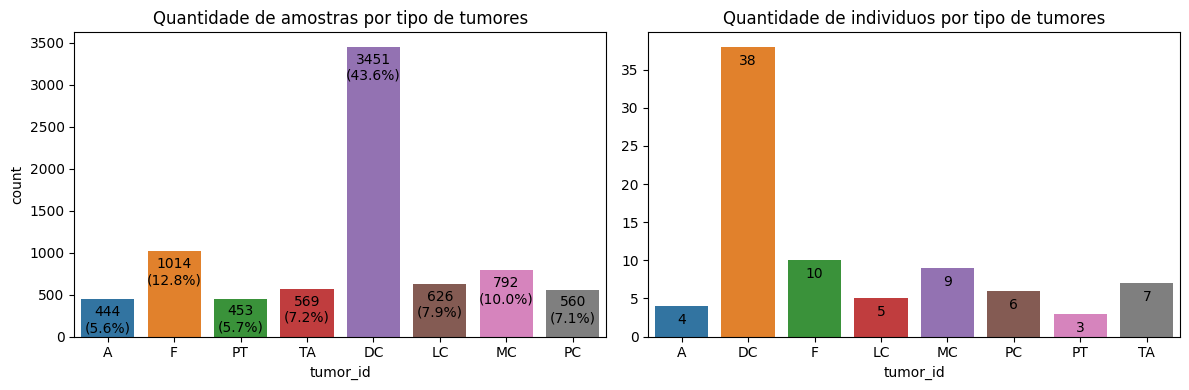

In [4]:
print("")
print(f"Quantidade total de imagens: ", len(df1))
print("")
# Plot 1
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='grp', data=df1)
plt.title('Conjunto de teste e treino')
annotations(ax1, len(df1))

# Plot 2
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='class', data=df1)
plt.title('Conjunto de classes')
annotations(ax2, len(df1))

plt.tight_layout()
plt.show()

# Plot 3
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
ax3 = sns.countplot(x='tumor_id', data=df1)
plt.title('Quantidade de amostras por tipo de tumores')
annotations(ax3, len(df1) )

# Plot 4
plt.subplot(1, 2, 2)
slide_id_counts = df1.groupby('tumor_id')['slide_id'].nunique()
ax4 = sns.barplot(x=slide_id_counts.index, y=slide_id_counts.values)
plt.title('Quantidade de individuos por tipo de tumores')
annotations(ax4)

plt.tight_layout()
plt.show()

* Quantidade de imagens por pasta

In [5]:
import os
import shutil
shutil.copy('/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/count_files.sh', '/kaggle/working/count_files.sh')
os.system('bash /kaggle/working/count_files.sh /kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/')

/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-29960CD/200X : 16
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-29960CD/400X : 17
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-29960CD/40X : 15
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-29960CD/100X : 13
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549CD/200X : 31
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549CD/400X : 30
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549CD/40X : 35
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549CD/100X : 36
/kaggle/input/breakhis/BreaKHis_v1/BreaKHi

0